## Capture of image views

### Clear scene and load sample data set

In [1]:
# Clear scene
slicer.mrmlScene.Clear(False)

import SampleData
sampleDataLogic = SampleData.SampleDataLogic()

volume = sampleDataLogic.downloadMRHead()
#volume = sampleDataLogic.downloadCTChest()

slicer.app.layoutManager().setLayout(slicer.vtkMRMLLayoutNode.SlicerLayoutFourUpView)
#slicer.app.layoutManager().setLayout(slicer.vtkMRMLLayoutNode.SlicerLayoutOneUpRedSliceView)

<b>File already exists in cache - reusing it.</b>
<b>Requesting load</b> <i>MRHead</i> from C:/Users/andra/AppData/Local/Temp/Slicer/RemoteIO/MR-head.nrrd...
<b>Load finished</b>


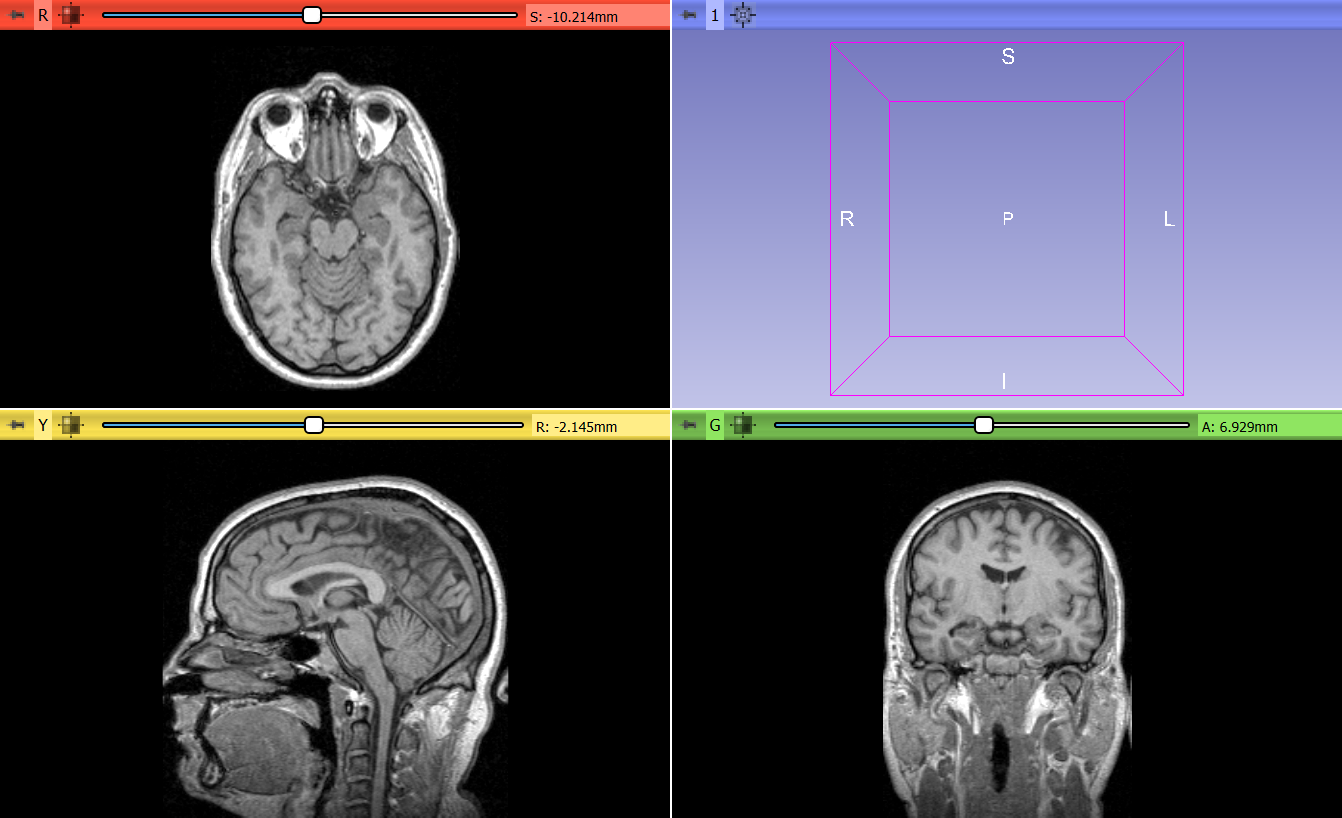

In [2]:
# Display views
display()

### Capture the full Slicer screen and save it into a file

In [3]:
img = qt.QPixmap.grabWidget(slicer.util.mainWindow()).toImage()
img.save('outputs/Capture-MainWindow.png')
# Image file should appear in outputs folder

### Capture all the views save it into a file

In [4]:
import ScreenCapture
cap = ScreenCapture.ScreenCaptureLogic()
cap.showViewControllers(False)
cap.captureImageFromView(None,'outputs/Capture-Views.png')
cap.showViewControllers(True)
# Image file should appear in outputs folder

### Capture a single view and save it into file
Common values for viewNodeID: `vtkMRMLSliceNodeRed`, `vtkMRMLSliceNodeYellow`, `vtkMRMLSliceNodeGreen`, `vtkMRMLViewNode1`, `vtkMRMLViewNode2`. ScreenCapture module can also create video animations of rotating views, slice sweeps, etc.

In [5]:
import ScreenCapture
cap = ScreenCapture.ScreenCaptureLogic()

# Capture 3D view
viewNodeID = 'vtkMRMLViewNode1'
view = cap.viewFromNode(slicer.mrmlScene.GetNodeByID(viewNodeID))
cap.captureImageFromView(view,'outputs/Capture-3D.png')

# Capture red slice view
viewNodeID = 'vtkMRMLSliceNodeRed'
view = cap.viewFromNode(slicer.mrmlScene.GetNodeByID(viewNodeID))
cap.captureImageFromView(view,'outputs/Capture-RedSlice.png')

# Image files should appear in outputs folder

### Capture a slice view sweep into a series of PNG files

In [6]:
# Capture red slice view, 30 images, from position -125.0 to 75.0
# into current folder, with name image_00001.png, image_00002.png, ...
import ScreenCapture
viewNodeID = 'vtkMRMLSliceNodeRed'
destinationFolder = 'outputs/Capture-SliceSweep'
slicePositionRange = [-125.0, 75.0]
numberOfFrames = 30
viewNode = slicer.mrmlScene.GetNodeByID(viewNodeID)
ScreenCapture.ScreenCaptureLogic().captureSliceSweep(viewNode,
                                                     slicePositionRange[0], slicePositionRange[1],
                                                     numberOfFrames,
                                                     destinationFolder, "image_%05d.png")

# Image files should appear in outputs/Capture-SliceSweep folder.

Write outputs/Capture-SliceSweep\image_00000.png
Write outputs/Capture-SliceSweep\image_00001.png
Write outputs/Capture-SliceSweep\image_00002.png
Write outputs/Capture-SliceSweep\image_00003.png
Write outputs/Capture-SliceSweep\image_00004.png
Write outputs/Capture-SliceSweep\image_00005.png
Write outputs/Capture-SliceSweep\image_00006.png
Write outputs/Capture-SliceSweep\image_00007.png
Write outputs/Capture-SliceSweep\image_00008.png
Write outputs/Capture-SliceSweep\image_00009.png
Write outputs/Capture-SliceSweep\image_00010.png
Write outputs/Capture-SliceSweep\image_00011.png
Write outputs/Capture-SliceSweep\image_00012.png
Write outputs/Capture-SliceSweep\image_00013.png
Write outputs/Capture-SliceSweep\image_00014.png
Write outputs/Capture-SliceSweep\image_00015.png
Write outputs/Capture-SliceSweep\image_00016.png
Write outputs/Capture-SliceSweep\image_00017.png
Write outputs/Capture-SliceSweep\image_00018.png
Write outputs/Capture-SliceSweep\image_00019.png
Write outputs/Captur

### Load volume from file

In [7]:
# Clear scene
slicer.mrmlScene.Clear(False)

# When loading a volume from file, it is recommended to set returnNode=True to retrieve the loaded volume node.
[success, volume] = slicer.util.loadVolume('data/MRBrainTumor1.nrrd', returnNode=True)
print("Success: {0}".format(success))
print("Volume size: {0}".format(volume.GetImageData().GetDimensions()))

Success: True
Volume size: (256, 256, 112)


### Run command-line interface module

In [8]:
# Print module parameters
cliModule = slicer.modules.grayscalemodelmaker
print('{0} module parameters:'.format(cliModule.name))
n = cliModule.cliModuleLogic().CreateNode()
for groupIndex in xrange(0,n.GetNumberOfParameterGroups()):
    for parameterIndex in xrange(0,n.GetNumberOfParametersInGroup(groupIndex)):
        print '  Parameter ({0}/{1}): {2} ({3}, {4})'.format(groupIndex, parameterIndex,
            n.GetParameterName(groupIndex, parameterIndex),
            n.GetParameterTag(groupIndex, parameterIndex),
            n.GetParameterLabel(groupIndex, parameterIndex))

GrayscaleModelMaker module parameters:
  Parameter (0/0): InputVolume (image, Input Volume)
  Parameter (0/1): OutputGeometry (geometry, Output Geometry)
  Parameter (1/0): Threshold (float, Threshold)
  Parameter (1/1): Name (string, Model Name)
  Parameter (1/2): Smooth (integer, Smooth)
  Parameter (1/3): Decimate (float, Decimate)
  Parameter (1/4): SplitNormals (boolean, Split Normals?)
  Parameter (1/5): PointNormals (boolean, Compute Point Normals?)


In [9]:
# Create model by simple thresholding
parameters = {}
parameters["InputVolume"] = volume.GetID()
outModel = slicer.vtkMRMLModelNode()
slicer.mrmlScene.AddNode( outModel )
parameters["OutputGeometry"] = outModel.GetID()
parameters["Threshold"] = 170
grayMaker = slicer.modules.grayscalemodelmaker
slicer.cli.runSync(grayMaker, None, parameters)
slicer.app.layoutManager().setLayout(slicer.vtkMRMLLayoutNode.SlicerLayoutOneUp3DView)

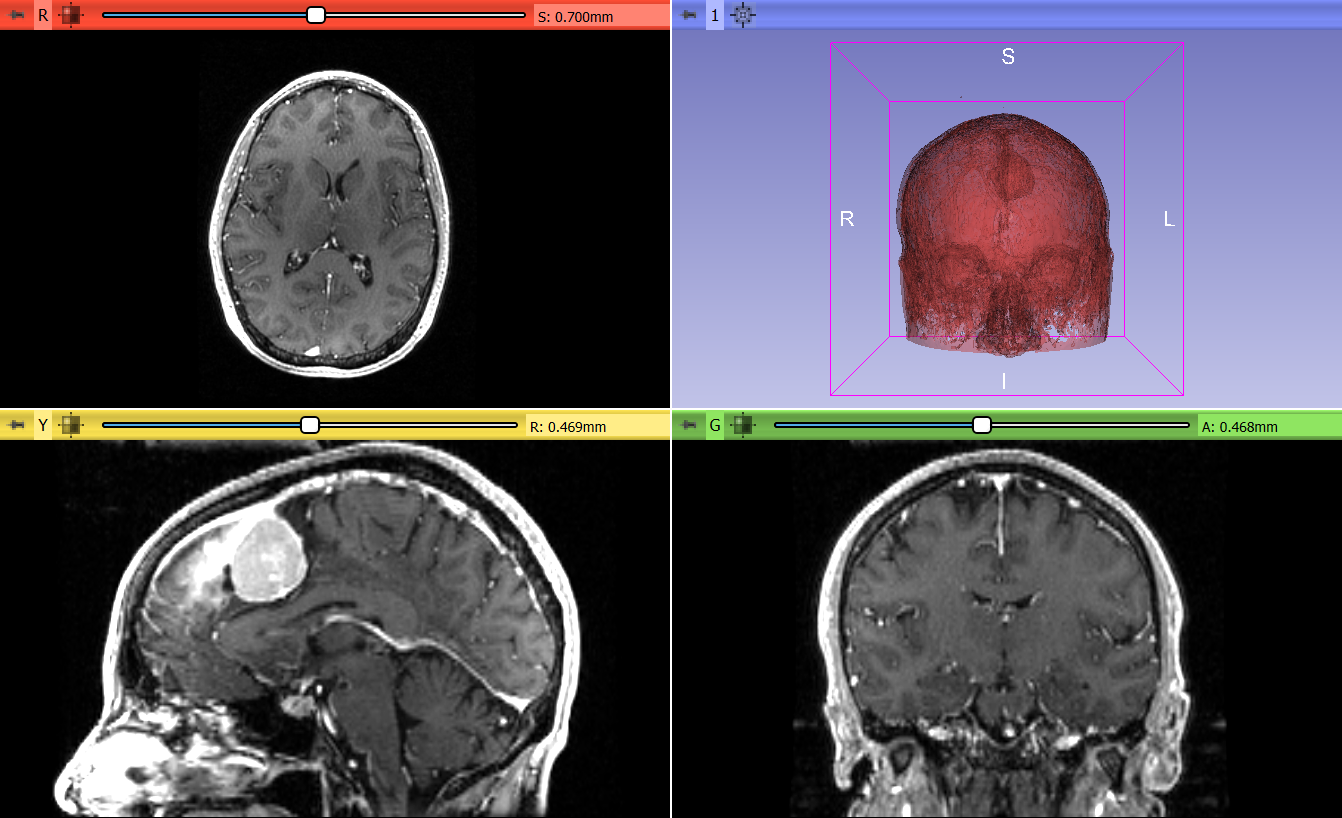

In [10]:
# Display model as a colored semi-transparent surface
displayNode = outModel.GetDisplayNode()
displayNode.SetColor(0.8, 0.3, 0.3)
displayNode.SetOpacity(0.5)
slicer.app.layoutManager().setLayout(slicer.vtkMRMLLayoutNode.SlicerLayoutFourUpView)
display()

#### Run this example in your browser using Binder: [![Binder](https://mybinder.org/badge.svg)](https://mybinder.org/v2/gh/slicer/SlicerNotebooks/master?filepath=01_Data_Loading_and_Visualization.ipynb)